TD 2 TNS


 *Exercise 1*


 x(t) = 5*cos(2π*1000*t), sampled at fs = 8 kHz

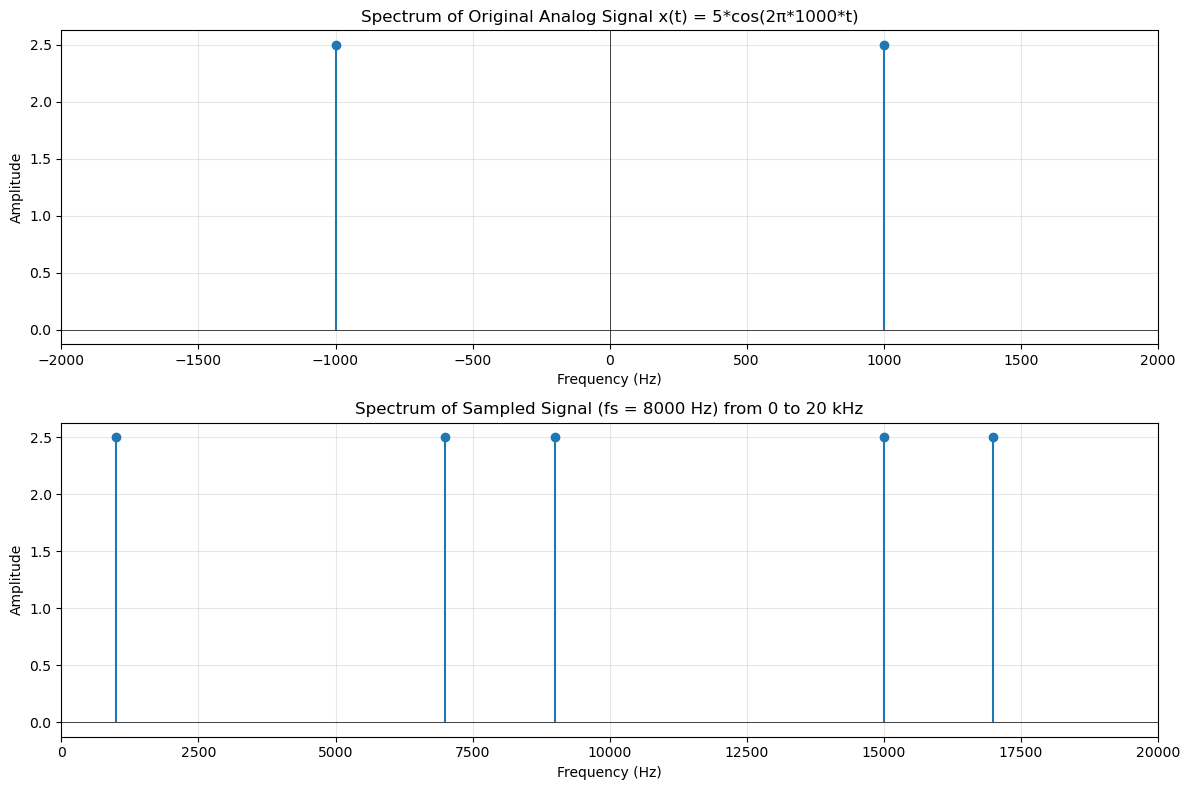

Exercise 1 Results:
Original signal frequency: 1000 Hz
Sampling frequency: 8000 Hz
Nyquist frequency: 4000.0 Hz
Since f0 (1000 Hz) < fs/2 (4000.0 Hz), no aliasing occurs.

Spectral components in sampled signal (0-20 kHz):
  1000 Hz
  7000 Hz
  9000 Hz
  15000 Hz
  17000 Hz


In [2]:
import numpy as np
import matplotlib.pyplot as plt



# Parameters
f0 = 1000  # Signal frequency in Hz
A = 5      # Amplitude
fs = 8000  # Sampling frequency in Hz

# a. Sketch the spectrum for the original signal
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Original signal spectrum (only at f0 = 1000 Hz)
frequencies_original = [-f0, f0]
amplitudes_original = [A/2, A/2]

ax1.stem(frequencies_original, amplitudes_original, basefmt=' ')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Spectrum of Original Analog Signal x(t) = 5*cos(2π*1000*t)')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-2000, 2000)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

# b. Sketch the spectrum for the sampled signal from 0 to 20 kHz
# Sampling creates replicas at f0 ± k*fs for k = 0, ±1, ±2, ...
frequencies_sampled = []
amplitudes_sampled = []

for k in range(-3, 4):  # Include enough replicas
    # Positive frequency component
    f_pos = f0 + k * fs
    if -1000 <= f_pos <= 20000:
        frequencies_sampled.append(f_pos)
        amplitudes_sampled.append(A/2)
    
    # Negative frequency component
    f_neg = -f0 + k * fs
    if -1000 <= f_neg <= 20000:
        frequencies_sampled.append(f_neg)
        amplitudes_sampled.append(A/2)

ax2.stem(frequencies_sampled, amplitudes_sampled, basefmt=' ')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.set_title(f'Spectrum of Sampled Signal (fs = {fs} Hz) from 0 to 20 kHz')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 20000)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

print("Exercise 1 Results:")
print(f"Original signal frequency: {f0} Hz")
print(f"Sampling frequency: {fs} Hz")
print(f"Nyquist frequency: {fs/2} Hz")
print(f"Since f0 ({f0} Hz) < fs/2 ({fs/2} Hz), no aliasing occurs.")
print(f"\nSpectral components in sampled signal (0-20 kHz):")
for f in sorted(set(frequencies_sampled)):
    if 0 <= f <= 20000:
        print(f"  {f} Hz")

In [ ]:
* Exercise 2*

x(t) = 5*cos(2π*2000*t) + 3*cos(2π*3000*t), sampled at fs = 8000 Hz

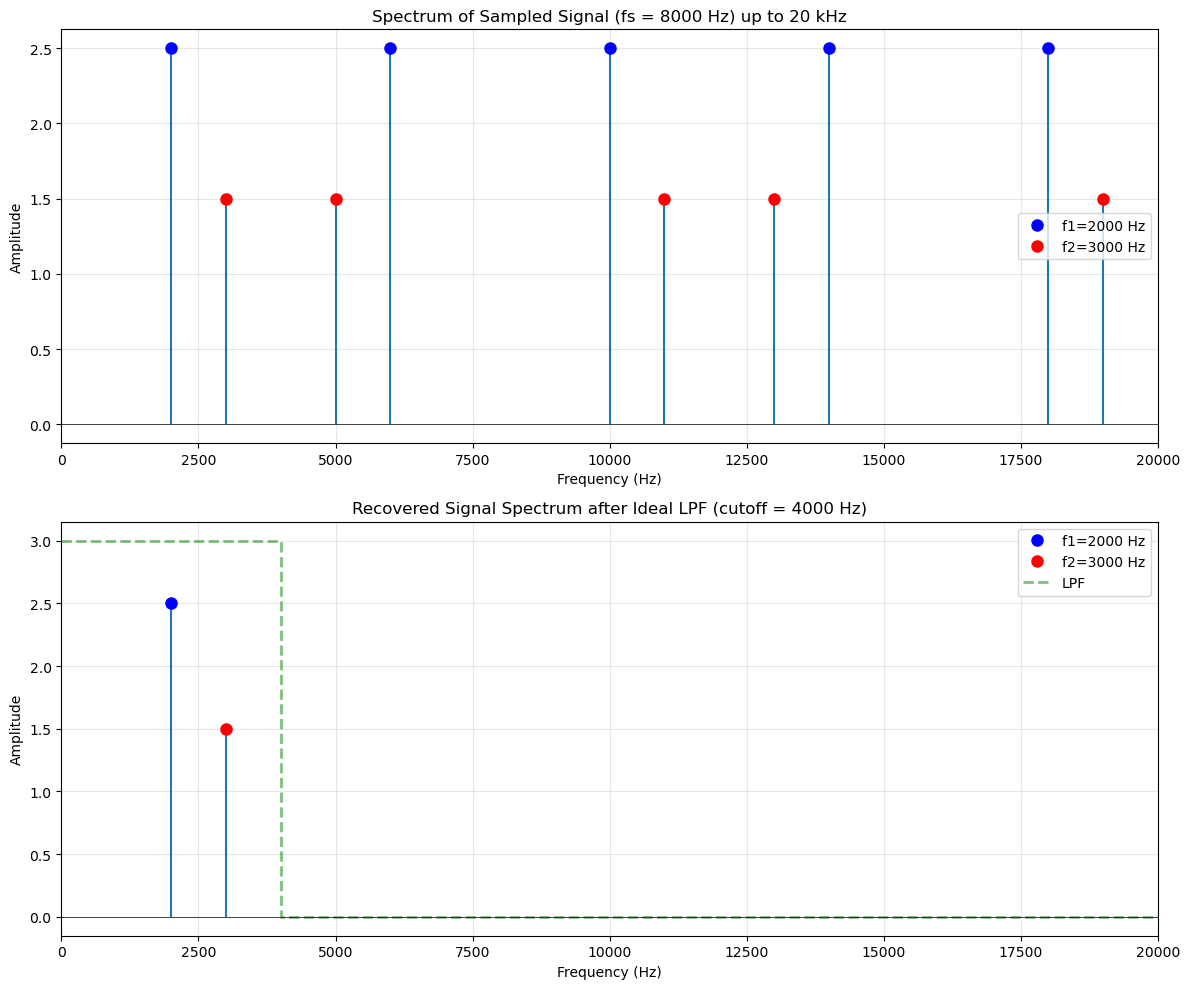

Exercise 2 Results:
Original signal frequencies: 2000 Hz and 3000 Hz
Sampling frequency: 8000 Hz
Nyquist frequency: 4000.0 Hz

Both frequencies are below Nyquist frequency, so no aliasing occurs.

Recovered signal components (after 4 kHz LPF):
  2000 Hz with amplitude 5 (from original 2000 Hz component)
  3000 Hz with amplitude 3 (from original 3000 Hz component)

Conclusion: The original signal is perfectly recovered.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
f1 = 2000  # First frequency in Hz
A1 = 5     # First amplitude
f2 = 3000  # Second frequency in Hz
A2 = 3     # Second amplitude
fs = 8000  # Sampling frequency in Hz

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# a. Sketch the spectrum of the sampled signal up to 20 kHz
frequencies_sampled = []
amplitudes_sampled = []

# Generate replicas for both frequency components
for k in range(-3, 4):
    # Component 1: f1 = 2000 Hz
    f_pos1 = f1 + k * fs
    f_neg1 = -f1 + k * fs
    
    if 0 <= f_pos1 <= 20000:
        frequencies_sampled.append(f_pos1)
        amplitudes_sampled.append(A1/2)
    if 0 <= f_neg1 <= 20000:
        frequencies_sampled.append(f_neg1)
        amplitudes_sampled.append(A1/2)
    
    # Component 2: f2 = 3000 Hz
    f_pos2 = f2 + k * fs
    f_neg2 = -f2 + k * fs
    
    if 0 <= f_pos2 <= 20000:
        frequencies_sampled.append(f_pos2)
        amplitudes_sampled.append(A2/2)
    if 0 <= f_neg2 <= 20000:
        frequencies_sampled.append(f_neg2)
        amplitudes_sampled.append(A2/2)

# Sort for better visualization
sorted_indices = np.argsort(frequencies_sampled)
frequencies_sampled = [frequencies_sampled[i] for i in sorted_indices]
amplitudes_sampled = [amplitudes_sampled[i] for i in sorted_indices]

colors = ['blue' if amp == A1/2 else 'red' for amp in amplitudes_sampled]
ax1.stem(frequencies_sampled, amplitudes_sampled, basefmt=' ')
for i, (f, a) in enumerate(zip(frequencies_sampled, amplitudes_sampled)):
    color = 'blue' if a == A1/2 else 'red'
    ax1.plot(f, a, 'o', color=color, markersize=8)

ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Amplitude')
ax1.set_title(f'Spectrum of Sampled Signal (fs = {fs} Hz) up to 20 kHz')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 20000)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.legend(['f1=2000 Hz', 'f2=3000 Hz'])

# b. Sketch the recovered signal spectrum with ideal LPF (cutoff = 4 kHz)
frequencies_recovered = []
amplitudes_recovered = []
cutoff = 4000  # Hz

for f, a in zip(frequencies_sampled, amplitudes_sampled):
    if f <= cutoff:
        frequencies_recovered.append(f)
        amplitudes_recovered.append(a)

colors_rec = ['blue' if amp == A1/2 else 'red' for amp in amplitudes_recovered]
ax2.stem(frequencies_recovered, amplitudes_recovered, basefmt=' ')
for i, (f, a) in enumerate(zip(frequencies_recovered, amplitudes_recovered)):
    color = 'blue' if a == A1/2 else 'red'
    ax2.plot(f, a, 'o', color=color, markersize=8)

# Draw the LPF response
lpf_freq = np.array([0, cutoff, cutoff, 20000])
lpf_response = np.array([3, 3, 0, 0])
ax2.plot(lpf_freq, lpf_response, 'g--', linewidth=2, label='Ideal LPF', alpha=0.5)

ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.set_title(f'Recovered Signal Spectrum after Ideal LPF (cutoff = {cutoff} Hz)')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 20000)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.legend(['f1=2000 Hz', 'f2=3000 Hz', 'LPF'])

plt.tight_layout()
plt.show()

print("Exercise 2 Results:")
print(f"Original signal frequencies: {f1} Hz and {f2} Hz")
print(f"Sampling frequency: {fs} Hz")
print(f"Nyquist frequency: {fs/2} Hz")
print(f"\nBoth frequencies are below Nyquist frequency, so no aliasing occurs.")
print(f"\nRecovered signal components (after 4 kHz LPF):")
for f in sorted(set(frequencies_recovered)):
    amp = amplitudes_recovered[frequencies_recovered.index(f)]
    orig_amp = A1 if amp == A1/2 else A2
    orig_f = f1 if amp == A1/2 else f2
    print(f"  {f} Hz with amplitude {orig_amp} (from original {orig_f} Hz component)")
print(f"\nConclusion: The original signal is perfectly recovered.")

Exercise 3

x(t) = 5*cos(2π*2000*t) + cos(2π*5000*t), sampled at fs = 8000 Hz

ALIASING DETECTED!
f2 = 5000 Hz > Nyquist frequency (4000.0 Hz)
f2 aliases to: 3000 Hz
Alias formula: f_alias = fs - f2 = 8000 - 5000 = 3000 Hz


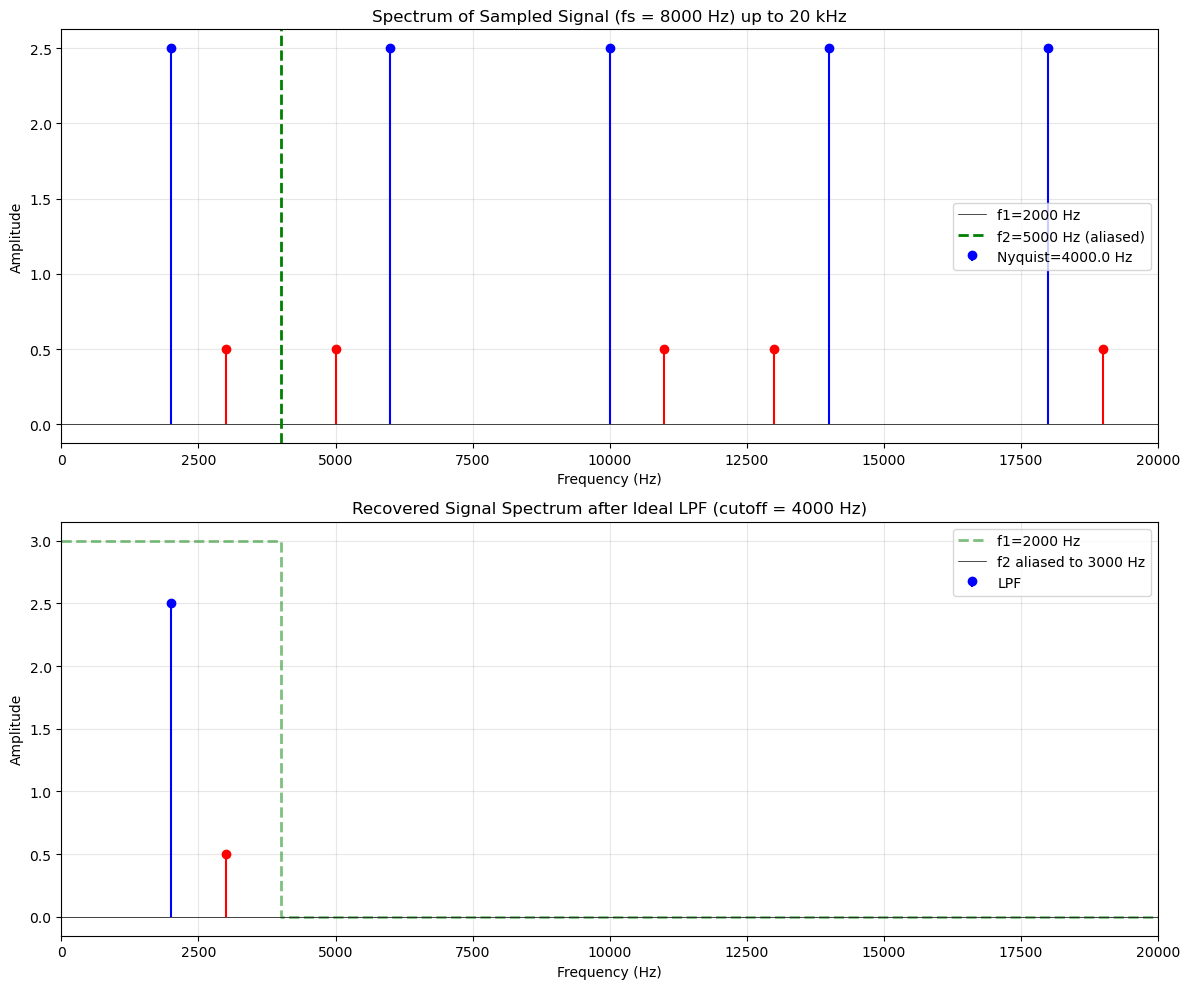


Exercise 3 Results:
Original signal frequencies: 2000 Hz and 5000 Hz
Sampling frequency: 8000 Hz
Nyquist frequency: 4000.0 Hz

Frequency Analysis:
  f1 = 2000 Hz < Nyquist (4000.0 Hz) ✓ No aliasing
  f2 = 5000 Hz > Nyquist (4000.0 Hz) ✗ ALIASING!

Aliasing Effect:
  f2 = 5000 Hz appears as 3000 Hz in the sampled signal

Recovered Signal (after 4 kHz LPF):
  Component 1: 2000 Hz with amplitude 5 ✓ Correct
  Component 2: 3000 Hz with amplitude 1 ✗ Wrong frequency!

Conclusion:
  The recovered signal is: y(t) = 5*cos(2π*2000*t) + 1*cos(2π*3000*t)
  This is NOT the original signal due to aliasing!
  The 5000 Hz component was corrupted and appears as 3000 Hz.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
f1 = 2000  # First frequency in Hz
A1 = 5     # First amplitude
f2 = 5000  # Second frequency in Hz (above Nyquist!)
A2 = 1     # Second amplitude
fs = 8000  # Sampling frequency in Hz

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# a. Sketch the spectrum of the sampled signal up to 20 kHz
frequencies_sampled = []
amplitudes_sampled = []
labels = []

# Generate replicas for both frequency components
for k in range(-3, 4):
    # Component 1: f1 = 2000 Hz
    f_pos1 = f1 + k * fs
    f_neg1 = -f1 + k * fs
    
    if 0 <= f_pos1 <= 20000:
        frequencies_sampled.append(f_pos1)
        amplitudes_sampled.append(A1/2)
        labels.append('f1')
    if 0 <= f_neg1 <= 20000:
        frequencies_sampled.append(f_neg1)
        amplitudes_sampled.append(A1/2)
        labels.append('f1')
    
    # Component 2: f2 = 5000 Hz (THIS WILL ALIAS!)
    f_pos2 = f2 + k * fs
    f_neg2 = -f2 + k * fs
    
    if 0 <= f_pos2 <= 20000:
        frequencies_sampled.append(f_pos2)
        amplitudes_sampled.append(A2/2)
        labels.append('f2')
    if 0 <= f_neg2 <= 20000:
        frequencies_sampled.append(f_neg2)
        amplitudes_sampled.append(A2/2)
        labels.append('f2')

# Sort for better visualization
sorted_indices = np.argsort(frequencies_sampled)
frequencies_sampled = [frequencies_sampled[i] for i in sorted_indices]
amplitudes_sampled = [amplitudes_sampled[i] for i in sorted_indices]
labels = [labels[i] for i in sorted_indices]

# Plot with colors
for i, (f, a, lbl) in enumerate(zip(frequencies_sampled, amplitudes_sampled, labels)):
    color = 'blue' if lbl == 'f1' else 'red'
    ax1.stem([f], [a], basefmt=' ', linefmt=color, markerfmt='o'+color[0])

ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Amplitude')
ax1.set_title(f'Spectrum of Sampled Signal (fs = {fs} Hz) up to 20 kHz')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 20000)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=fs/2, color='green', linestyle='--', linewidth=2, label=f'Nyquist freq ({fs/2} Hz)')
ax1.legend(['f1=2000 Hz', 'f2=5000 Hz (aliased)', f'Nyquist={fs/2} Hz'])

# Calculate aliasing
f2_alias = fs - f2  # 8000 - 5000 = 3000 Hz
print(f"ALIASING DETECTED!")
print(f"f2 = {f2} Hz > Nyquist frequency ({fs/2} Hz)")
print(f"f2 aliases to: {f2_alias} Hz")
print(f"Alias formula: f_alias = fs - f2 = {fs} - {f2} = {f2_alias} Hz")

# b. Sketch the recovered signal spectrum with ideal LPF (cutoff = 4 kHz)
frequencies_recovered = []
amplitudes_recovered = []
labels_recovered = []
cutoff = 4000  # Hz

for f, a, lbl in zip(frequencies_sampled, amplitudes_sampled, labels):
    if f <= cutoff:
        frequencies_recovered.append(f)
        amplitudes_recovered.append(a)
        labels_recovered.append(lbl)

# Plot recovered spectrum
for i, (f, a, lbl) in enumerate(zip(frequencies_recovered, amplitudes_recovered, labels_recovered)):
    color = 'blue' if lbl == 'f1' else 'red'
    ax2.stem([f], [a], basefmt=' ', linefmt=color, markerfmt='o'+color[0])

# Draw the LPF response
lpf_freq = np.array([0, cutoff, cutoff, 20000])
lpf_response = np.array([3, 3, 0, 0])
ax2.plot(lpf_freq, lpf_response, 'g--', linewidth=2, alpha=0.5)

ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.set_title(f'Recovered Signal Spectrum after Ideal LPF (cutoff = {cutoff} Hz)')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 20000)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.legend(['f1=2000 Hz', 'f2 aliased to 3000 Hz', 'LPF'])

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Exercise 3 Results:")
print("="*60)
print(f"Original signal frequencies: {f1} Hz and {f2} Hz")
print(f"Sampling frequency: {fs} Hz")
print(f"Nyquist frequency: {fs/2} Hz")
print(f"\nFrequency Analysis:")
print(f"  f1 = {f1} Hz < Nyquist ({fs/2} Hz) ✓ No aliasing")
print(f"  f2 = {f2} Hz > Nyquist ({fs/2} Hz) ✗ ALIASING!")
print(f"\nAliasing Effect:")
print(f"  f2 = {f2} Hz appears as {f2_alias} Hz in the sampled signal")
print(f"\nRecovered Signal (after 4 kHz LPF):")
print(f"  Component 1: {f1} Hz with amplitude {A1} ✓ Correct")
print(f"  Component 2: {f2_alias} Hz with amplitude {A2} ✗ Wrong frequency!")
print(f"\nConclusion:")
print(f"  The recovered signal is: y(t) = {A1}*cos(2π*{f1}*t) + {A2}*cos(2π*{f2_alias}*t)")
print(f"  This is NOT the original signal due to aliasing!")
print(f"  The {f2} Hz component was corrupted and appears as {f2_alias} Hz.")

*Exercise 4*

 x(t) = 1 + 1*cos(2π*2000*t) + 2*cos(2π*4000*t) + 3*cos(2π*6000*t)

Sampled at fs = 8000 Hz

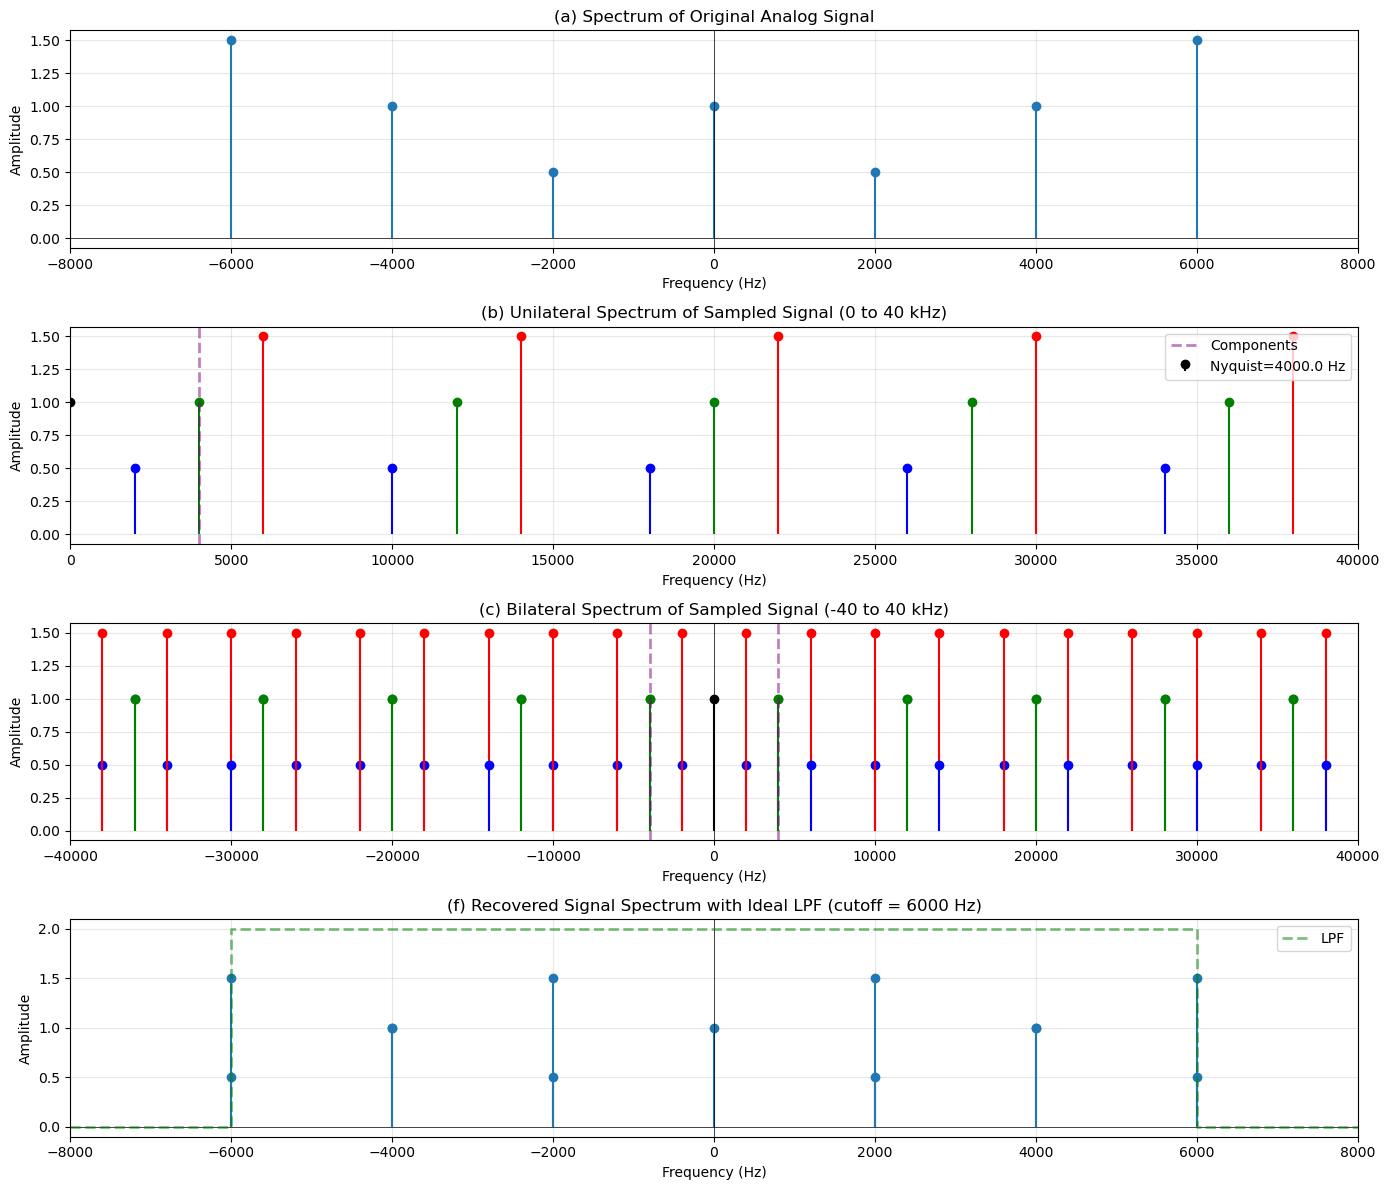

EXERCISE 4 - DETAILED ANALYSIS

Original Signal: x(t) = 1 + 1*cos(2π*2000*t) + 2*cos(2π*4000*t) + 3*cos(2π*6000*t)
Sampling Frequency: fs = 8000 Hz
Nyquist Frequency: fs/2 = 4000.0 Hz

(d) COMPARISON OF UNILATERAL vs BILATERAL SPECTRA:
----------------------------------------------------------------------
Unilateral spectrum: Shows only positive frequencies (0 to 40 kHz)
Bilateral spectrum: Shows both positive and negative frequencies (-40 to 40 kHz)
Conclusion: Bilateral spectrum is symmetric around f=0 (except DC)
            Both representations contain the same information

(e) ALIASING FREQUENCIES:
----------------------------------------------------------------------
f1 = 2000 Hz < Nyquist (4000.0 Hz) ✓ No aliasing
f2 = 4000 Hz = Nyquist (4000.0 Hz) ⚠ At Nyquist (ambiguous)
f3 = 6000 Hz > Nyquist (4000.0 Hz) ✗ ALIASING!

f3 aliasing calculation:
  f3_alias = fs - f3 = 8000 - 6000 = 2000 Hz
  The 6000 Hz component appears at 2000 Hz in baseband

(f) RECOVERED SIGNAL WITH 6 kHz LPF

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
DC = 1          # DC component
f1 = 2000       # First frequency
A1 = 1          # First amplitude
f2 = 4000       # Second frequency (at Nyquist!)
A2 = 2          # Second amplitude
f3 = 6000       # Third frequency (above Nyquist!)
A3 = 3          # Third amplitude
fs = 8000       # Sampling frequency

# Create figure with subplots
fig = plt.figure(figsize=(14, 12))

# a. Sketch the spectrum for the original signal
ax1 = plt.subplot(4, 1, 1)
original_freq = [0, -f1, f1, -f2, f2, -f3, f3]
original_amp = [DC, A1/2, A1/2, A2/2, A2/2, A3/2, A3/2]

ax1.stem(original_freq, original_amp, basefmt=' ')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Amplitude')
ax1.set_title('(a) Spectrum of Original Analog Signal')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-8000, 8000)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

# b. Sketch the unilateral spectrum of the sampled signal up to 40 kHz
ax2 = plt.subplot(4, 1, 2)

# Generate all frequency components (unilateral - only positive frequencies)
freq_unilateral = []
amp_unilateral = []
component_labels = []

# DC component
freq_unilateral.append(0)
amp_unilateral.append(DC)
component_labels.append('DC')

# Generate replicas for each frequency component
for k in range(-5, 6):
    # f1 = 2000 Hz
    f_pos = f1 + k * fs
    if 0 < f_pos <= 40000:
        freq_unilateral.append(f_pos)
        amp_unilateral.append(A1/2)
        component_labels.append('f1')
    
    # f2 = 4000 Hz
    f_pos = f2 + k * fs
    if 0 < f_pos <= 40000:
        freq_unilateral.append(f_pos)
        amp_unilateral.append(A2/2)
        component_labels.append('f2')
    
    # f3 = 6000 Hz (will alias!)
    f_pos = f3 + k * fs
    if 0 < f_pos <= 40000:
        freq_unilateral.append(f_pos)
        amp_unilateral.append(A3/2)
        component_labels.append('f3')

# Sort
sorted_idx = np.argsort(freq_unilateral)
freq_unilateral = [freq_unilateral[i] for i in sorted_idx]
amp_unilateral = [amp_unilateral[i] for i in sorted_idx]
component_labels = [component_labels[i] for i in sorted_idx]

for f, a, lbl in zip(freq_unilateral, amp_unilateral, component_labels):
    if lbl == 'DC':
        color = 'black'
    elif lbl == 'f1':
        color = 'blue'
    elif lbl == 'f2':
        color = 'green'
    else:
        color = 'red'
    ax2.stem([f], [a], basefmt=' ', linefmt=color, markerfmt='o')

ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.set_title('(b) Unilateral Spectrum of Sampled Signal (0 to 40 kHz)')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 40000)
ax2.axvline(x=fs/2, color='purple', linestyle='--', linewidth=2, alpha=0.5)
ax2.legend(['Components', f'Nyquist={fs/2} Hz'], loc='upper right')

# c. Sketch the bilateral spectrum of the sampled signal up to 40 kHz
ax3 = plt.subplot(4, 1, 3)

freq_bilateral = []
amp_bilateral = []
component_labels_bi = []

# DC component
freq_bilateral.append(0)
amp_bilateral.append(DC)
component_labels_bi.append('DC')

for k in range(-5, 6):
    # f1 component (both positive and negative)
    f_pos = f1 + k * fs
    f_neg = -f1 + k * fs
    if -40000 <= f_pos <= 40000:
        freq_bilateral.append(f_pos)
        amp_bilateral.append(A1/2)
        component_labels_bi.append('f1')
    if -40000 <= f_neg <= 40000:
        freq_bilateral.append(f_neg)
        amp_bilateral.append(A1/2)
        component_labels_bi.append('f1')
    
    # f2 component
    f_pos = f2 + k * fs
    f_neg = -f2 + k * fs
    if -40000 <= f_pos <= 40000:
        freq_bilateral.append(f_pos)
        amp_bilateral.append(A2/2)
        component_labels_bi.append('f2')
    if -40000 <= f_neg <= 40000:
        freq_bilateral.append(f_neg)
        amp_bilateral.append(A2/2)
        component_labels_bi.append('f2')
    
    # f3 component
    f_pos = f3 + k * fs
    f_neg = -f3 + k * fs
    if -40000 <= f_pos <= 40000:
        freq_bilateral.append(f_pos)
        amp_bilateral.append(A3/2)
        component_labels_bi.append('f3')
    if -40000 <= f_neg <= 40000:
        freq_bilateral.append(f_neg)
        amp_bilateral.append(A3/2)
        component_labels_bi.append('f3')

# Sort
sorted_idx = np.argsort(freq_bilateral)
freq_bilateral = [freq_bilateral[i] for i in sorted_idx]
amp_bilateral = [amp_bilateral[i] for i in sorted_idx]
component_labels_bi = [component_labels_bi[i] for i in sorted_idx]

for f, a, lbl in zip(freq_bilateral, amp_bilateral, component_labels_bi):
    if lbl == 'DC':
        color = 'black'
    elif lbl == 'f1':
        color = 'blue'
    elif lbl == 'f2':
        color = 'green'
    else:
        color = 'red'
    ax3.stem([f], [a], basefmt=' ', linefmt=color, markerfmt='o')

ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('Amplitude')
ax3.set_title('(c) Bilateral Spectrum of Sampled Signal (-40 to 40 kHz)')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(-40000, 40000)
ax3.axvline(x=fs/2, color='purple', linestyle='--', linewidth=2, alpha=0.5)
ax3.axvline(x=-fs/2, color='purple', linestyle='--', linewidth=2, alpha=0.5)
ax3.axvline(x=0, color='k', linewidth=0.5)

# f. Sketch recovered signal with 6 kHz LPF
ax4 = plt.subplot(4, 1, 4)

cutoff = 6000
freq_recovered = []
amp_recovered = []

for f, a in zip(freq_bilateral, amp_bilateral):
    if abs(f) <= cutoff:
        freq_recovered.append(f)
        amp_recovered.append(a)

ax4.stem(freq_recovered, amp_recovered, basefmt=' ')
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('Amplitude')
ax4.set_title(f'(f) Recovered Signal Spectrum with Ideal LPF (cutoff = {cutoff} Hz)')
ax4.grid(True, alpha=0.3)
ax4.set_xlim(-8000, 8000)
ax4.axhline(y=0, color='k', linewidth=0.5)
ax4.axvline(x=0, color='k', linewidth=0.5)

# Draw LPF
lpf_x = [-8000, -cutoff, -cutoff, cutoff, cutoff, 8000]
lpf_y = [0, 0, 2, 2, 0, 0]
ax4.plot(lpf_x, lpf_y, 'g--', linewidth=2, alpha=0.5, label='LPF')
ax4.legend()

plt.tight_layout()
plt.show()

# Print detailed analysis
print("="*70)
print("EXERCISE 4 - DETAILED ANALYSIS")
print("="*70)
print(f"\nOriginal Signal: x(t) = {DC} + {A1}*cos(2π*{f1}*t) + {A2}*cos(2π*{f2}*t) + {A3}*cos(2π*{f3}*t)")
print(f"Sampling Frequency: fs = {fs} Hz")
print(f"Nyquist Frequency: fs/2 = {fs/2} Hz")

print("\n(d) COMPARISON OF UNILATERAL vs BILATERAL SPECTRA:")
print("-" * 70)
print("Unilateral spectrum: Shows only positive frequencies (0 to 40 kHz)")
print("Bilateral spectrum: Shows both positive and negative frequencies (-40 to 40 kHz)")
print("Conclusion: Bilateral spectrum is symmetric around f=0 (except DC)")
print("            Both representations contain the same information")

print("\n(e) ALIASING FREQUENCIES:")
print("-" * 70)
print(f"f1 = {f1} Hz < Nyquist ({fs/2} Hz) ✓ No aliasing")
print(f"f2 = {f2} Hz = Nyquist ({fs/2} Hz) ⚠ At Nyquist (ambiguous)")
print(f"f3 = {f3} Hz > Nyquist ({fs/2} Hz) ✗ ALIASING!")
print(f"\nf3 aliasing calculation:")
print(f"  f3_alias = fs - f3 = {fs} - {f3} = {fs - f3} Hz")
print(f"  The {f3} Hz component appears at {fs - f3} Hz in baseband")

print("\n(f) RECOVERED SIGNAL WITH 6 kHz LPF:")
print("-" * 70)
print("Components that pass through the filter:")
print(f"  DC = {DC}")
print(f"  f1 = {f1} Hz with amplitude {A1} ✓")
print(f"  f2 = {f2} Hz with amplitude {A2} ✓")
print(f"  f3_alias = {fs - f3} Hz with amplitude {A3} ✗ (wrong frequency!)")
print(f"\nRecovered signal: y(t) = {DC} + {A1}*cos(2π*{f1}*t) + {A2}*cos(2π*{f2}*t) + {A3}*cos(2π*{fs-f3}*t)")
print("This is NOT the original signal!")

print("\n(g) PROPOSED FILTER TO RECOVER ORIGINAL SIGNAL:")
print("-" * 70)
print("To recover the original signal without aliasing, we need:")
print(f"1. Anti-aliasing filter BEFORE sampling with cutoff < {fs/2} Hz")
print(f"2. Increase sampling frequency to fs > 2*{f3} = {2*f3} Hz")
print(f"   Minimum fs = {2*f3} Hz (at least 12 kHz or higher)")
print(f"3. Recommended: fs ≥ {int(2.5*f3)} Hz for practical implementation")
print("\nWith current setup (fs=8000 Hz), perfect recovery is IMPOSSIBLE!")
print("="*70)